In [38]:
# Loading all needed packages at the start
import elastix
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
import numpy as np

## **Fill in your own paths in the cell**




In [39]:
# to Elastix.exe
ELASTIX_PATH=r"C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\elastix_files\elastix.exe"
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

# to Training Data
filepath_data = r"C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData"

### Load patient data and inspect


In [40]:
patient_nrs_list = ['p102','p107', 'p108', 'p109', 'p115', 'p116', 'p117', 
                    'p119', 'p120', 'p125', 'p127','p128', 'p129', 'p133', 'p135']

patient_nr = patient_nrs_list[12] #pick any index up to 14 for that patient
file_p_mr = filepath_data+ '\{}\mr_bffe.mhd'.format(patient_nr)  # example of patient 102 input MR image
file_p_mask = filepath_data+'\{}\prostaat.mhd'.format(patient_nr) # example of patient 102 segmentation mask

print(file_p_mr)
print(file_p_mask)

# Convert so images can be inspected
readable_mr = imageio.imread(file_p_mr)
readable_mask = imageio.imread(file_p_mask)


C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p129\mr_bffe.mhd
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p129\prostaat.mhd


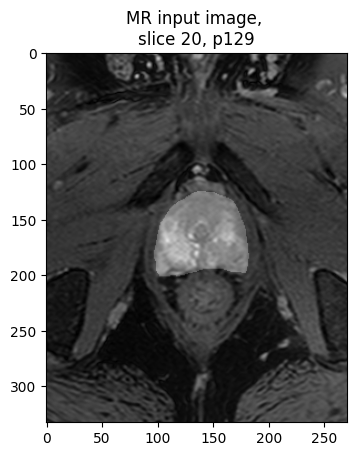

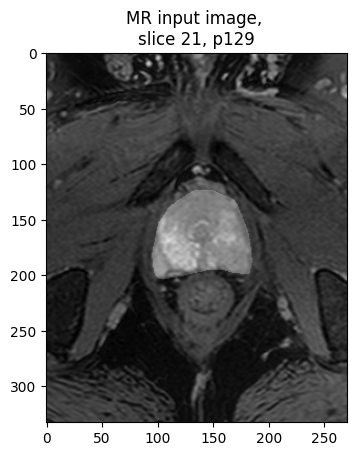

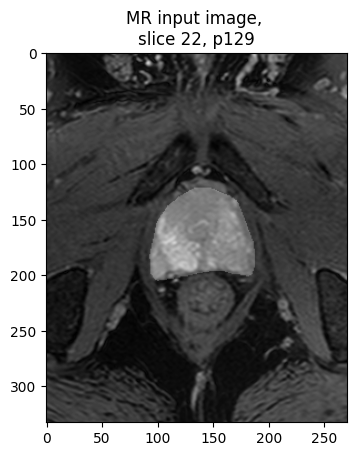

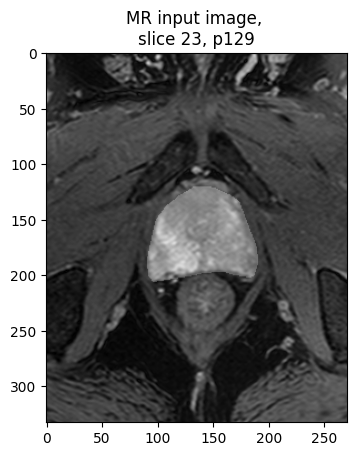

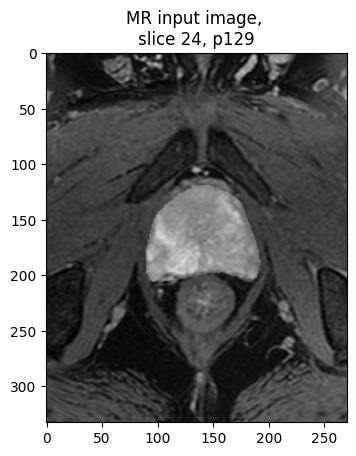

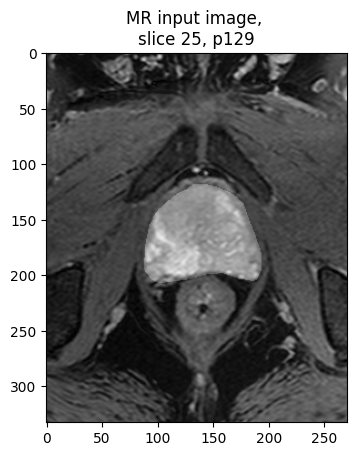

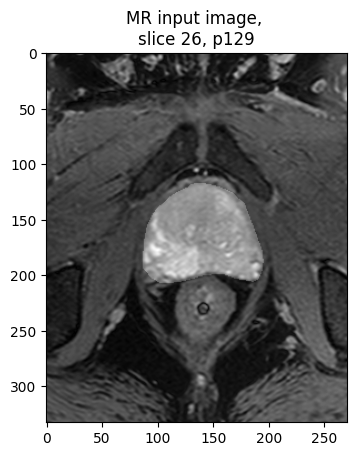

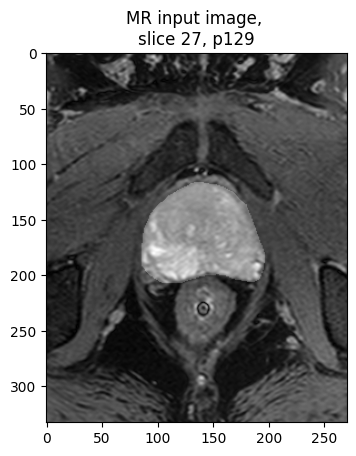

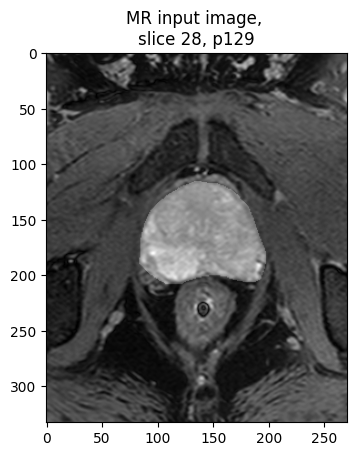

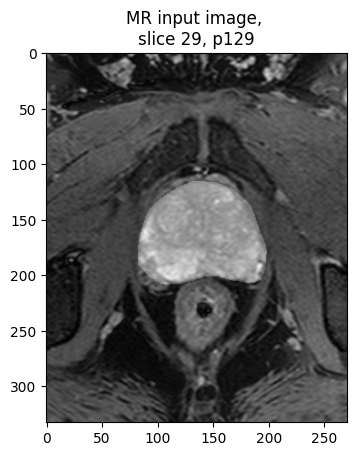

In [41]:
for i in range(20,30):
    plt.imshow(readable_mr[i,:,:], cmap='gray') 
    plt.imshow(readable_mask[i,:,:], cmap="gray",alpha =0.2) 
    
    plt.title('MR input image, \nslice {}, {}'.format(i, patient_nr))
    plt.show()

## Transformations with elastix : affine + non-linear 
# 1. AFFINE TRANSFORMATION


C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\Affine_L.txt
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_store


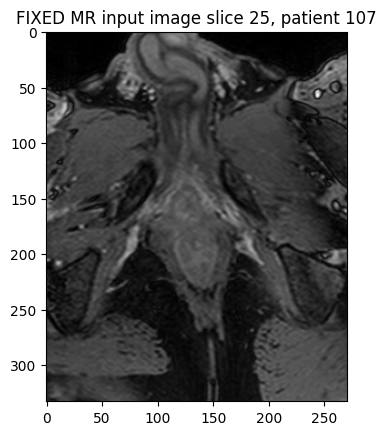

Text(0.5, 1.0, 'MOVING MR input image slice 25, patient 115')

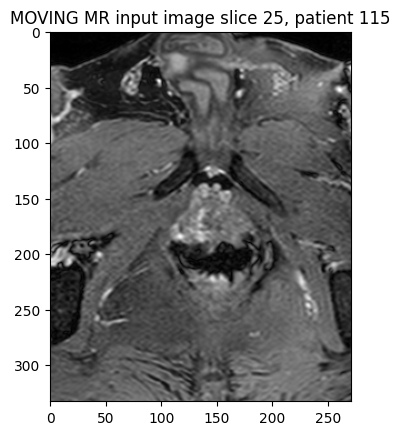

In [42]:

parameter_file_path_affine = os.path.join(filepath_data,'Affine_L.txt')  # path to the affine paramter file
output_file_path_experiment1 = os.path.join(filepath_data,'results_store')  # path to results folder

print(parameter_file_path_affine)
print(output_file_path_experiment1)

#load masks
#fixed_image_path =r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\prostaat.mhd'
#moving_image_path = r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p115\prostaat.mhd'

# register these to images for example
patient_fixed=107
patient_moving=115

#load images
fixed_image_path =r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\mr_bffe.mhd'
moving_image_path = r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p115\mr_bffe.mhd'
readable_fixed = imageio.imread(fixed_image_path)
readable_moving = imageio.imread(moving_image_path)

# visualize the images
plt.imshow(readable_fixed[25,:,:], cmap='gray') 
plt.title('FIXED MR input image slice 25, patient 107')

plt.show()

plt.imshow(readable_moving[25,:,:], cmap='gray') 
plt.title('MOVING MR input image slice 25, patient 115')


In [43]:
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[parameter_file_path_affine],
    output_dir=output_file_path_experiment1)

C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\elastix_files\elastix.exe -f C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\mr_bffe.mhd -m C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p115\mr_bffe.mhd -p C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\Affine_L.txt -out C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_store


In [44]:
itk_image_fixed = sitk.ReadImage(fixed_image_path)
image_array_fixed = sitk.GetArrayFromImage(itk_image_fixed)

itk_image_moving = sitk.ReadImage(moving_image_path)
image_array_moving = sitk.GetArrayFromImage(itk_image_moving)

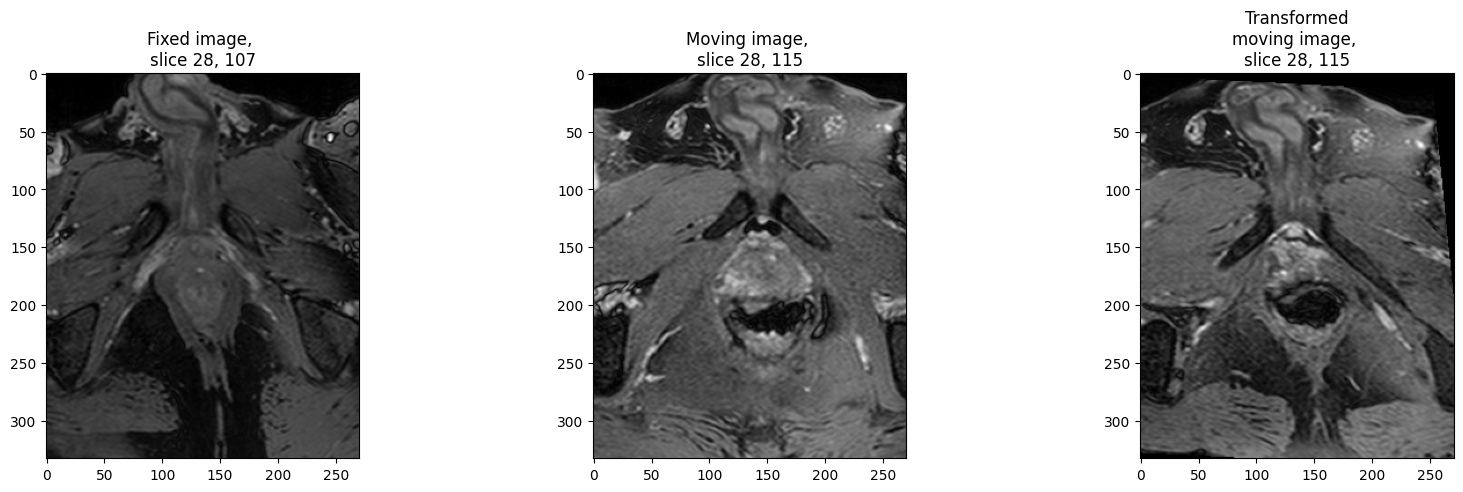

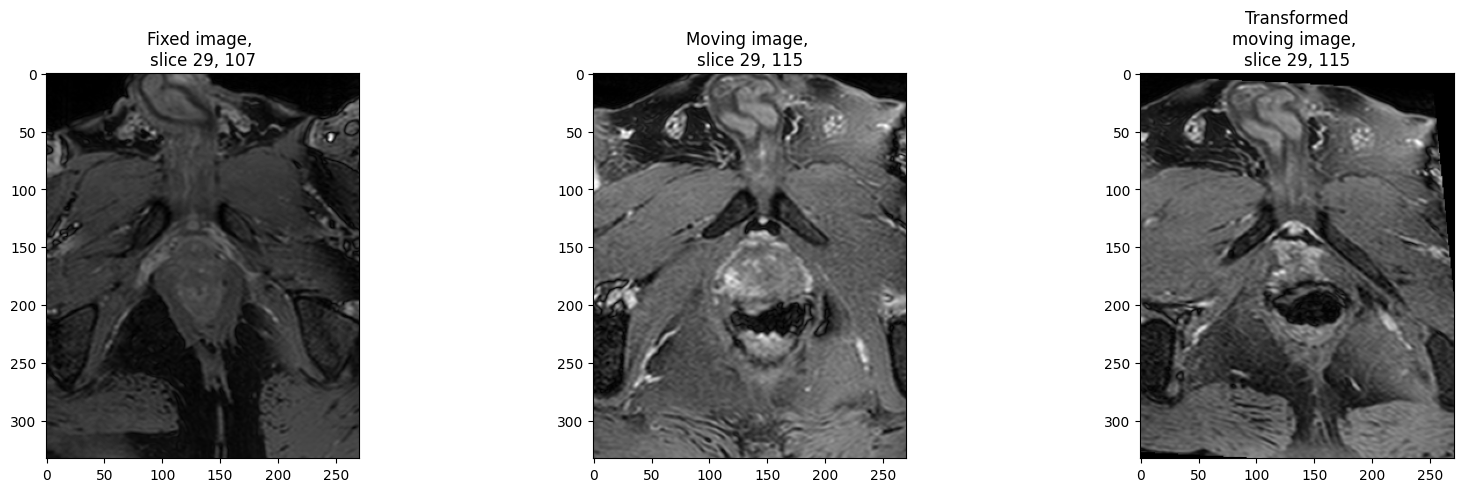

In [45]:
 # path to results from affine transformation
result_path_experiment1 = os.path.join(output_file_path_experiment1, 'result.0.mhd')
transformed_moving_image = imageio.imread(result_path_experiment1)

# visualize results (see a bigger range, these two slices are definitely not the best ones)
for i in range(28,30):

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(image_array_fixed[i,:,:], cmap='gray')
    ax[0].set_title('Fixed image, \nslice {}, {}'.format(i, patient_fixed))

    ax[1].imshow(image_array_moving[i,:,:], cmap='gray')
    ax[1].set_title('Moving image, \nslice {}, {}'.format(i, patient_moving))
    
    ax[2].imshow(transformed_moving_image[i,:,:], cmap='gray')
    ax[2].set_title('Transformed\nmoving image, \nslice {}, {}'.format(i, patient_moving))
    
    plt.show()
    

# 2. B SPLINES TRANSFORMATION

DO THIS AFTER AFFINE

In [46]:
#parameter_file_bsplines = os.path.join(filepath_data,'parameters_Bsplines.txt')
parameter_file_bsplines = os.path.join(filepath_data,'parametersjb4.txt') # path to bsplines parameter file 
output_bfile_path_experiment=os.path.join(filepath_data,'results_bspline') # path to new results forlder for b splines

print(fixed_image_path)
print(result_path_experiment1) 
print(parameter_file_bsplines)
print(output_bfile_path_experiment)


C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\mr_bffe.mhd
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_store\result.0.mhd
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\parametersjb4.txt
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_bspline


In [47]:
el.register(
    fixed_image=fixed_image_path,
    moving_image=result_path_experiment1,  # now moving image is the result from affine transformation
    parameters=[parameter_file_bsplines],
    output_dir=output_bfile_path_experiment)

C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\elastix_files\elastix.exe -f C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\mr_bffe.mhd -m C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_store\result.0.mhd -p C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\parametersjb4.txt -out C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_bspline


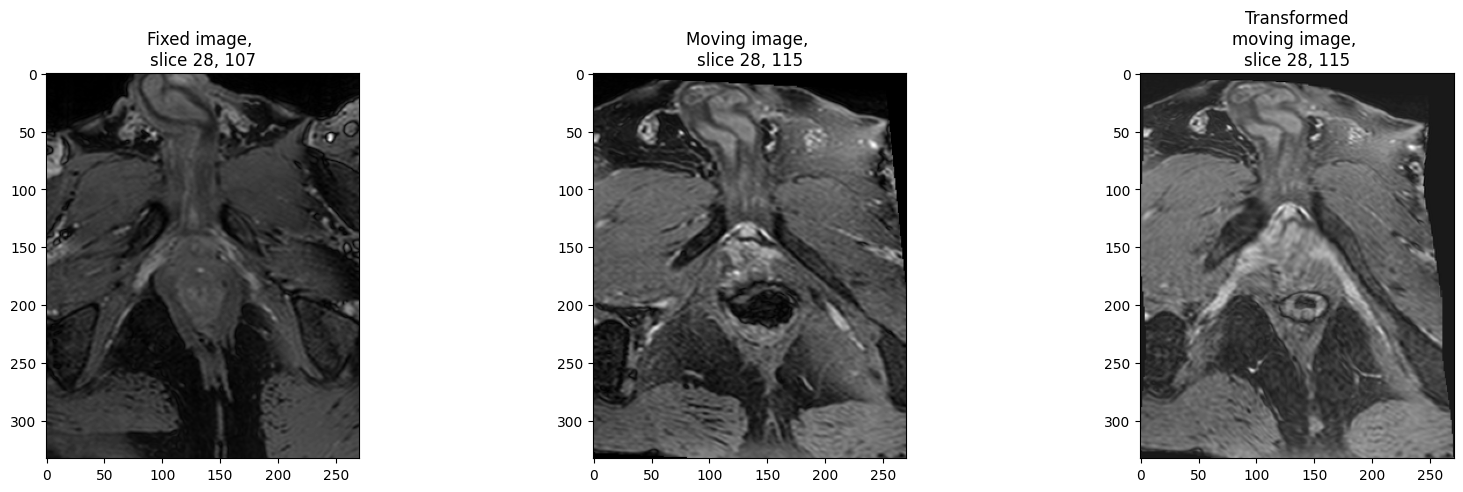

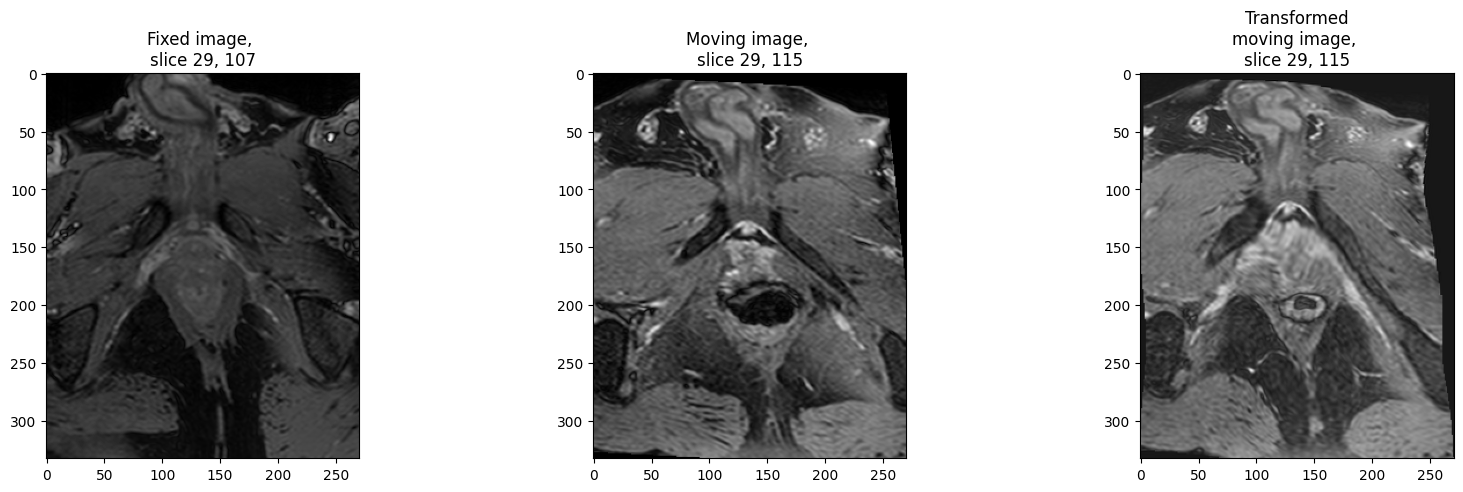

In [48]:

# path to fixed image
itk_image_fixed = sitk.ReadImage(fixed_image_path)
image_array_fixed = sitk.GetArrayFromImage(itk_image_fixed)

# path to moving image already transformed with affine transformation
affin_file_path=os.path.join(output_file_path_experiment1, 'result.0.mhd')
moving_image_affine=imageio.imread(affin_file_path)

# path to results from b splines
result_b_experiment = os.path.join(output_bfile_path_experiment, 'result.0.mhd')
transformed_moving_image2 = imageio.imread(result_b_experiment)

for i in range(28,30):

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(image_array_fixed[i,:,:], cmap='gray')
    ax[0].set_title('Fixed image, \nslice {}, {}'.format(i, patient_fixed))
    ax[1].imshow(moving_image_affine[i,:,:], cmap='gray')
    ax[1].set_title('Moving image, \nslice {}, {}'.format(i, patient_moving))
    ax[2].imshow(transformed_moving_image2[i,:,:], cmap='gray')
    ax[2].set_title('Transformed\nmoving image, \nslice {}, {}'.format(i, patient_moving))

plt.show()


### TRANSFORMIX AND JACOBIAN to see deformations

In [59]:
TRANSFORMIX_PATH=r"C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\elastix_files\transformix.exe"
transform_path_im = os.path.join(output_bfile_path_experiment,'TransformParameters.0.txt') # path to transform paramters file

print(transform_path_im)

tr = elastix.TransformixInterface(parameters=transform_path_im,
                                  transformix_path=TRANSFORMIX_PATH)

# path to output folder
output_dir_jacobian=r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_bspline'

jacobian_matrix_path = tr.jacobian_matrix(output_dir=output_dir_jacobian)

# Get the Jacobian determinant
jacobian_determinant_path = tr.jacobian_determinant(output_dir=output_dir_jacobian)

# Get the full deformation field
deformation_field_path = tr.deformation_field(output_dir=output_dir_jacobian)
imb=imageio.imread(jacobian_determinant_path,level=0)

# visualize jacobian
for i in range(28,30):
    plt.figure(figsize=(5,5))
    pos=plt.imshow(imb[i,:,:],cmap='gray')
    plt.colorbar(pos)

C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_bspline\TransformParameters.0.txt


KeyboardInterrupt: 

# TRANSFORMIX: use transform matrix to get the corresponding masks

## 1. Apply affine transformation to the masks

In [51]:
# Make a new transformix object tr with the CORRECT PATH to transformix

# to Transformix.exe
TRANSFORMIX_PATH=r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\elastix_files\transformix.exe'

# IMPORTANT: To get this you must create a copy of your 'TransformParameters.0.txt', call it for example
# 'TransformParameters.0b.txt' , and in that file change this parameter to 0 --> (FinalBSplineInterpolationOrder 0)
transform_path = os.path.join(output_file_path_experiment1,'TransformParameters.0b.txt') # path to transformation affine matrix.
print(transform_path)

tr = elastix.TransformixInterface(parameters=transform_path,
                                  transformix_path=TRANSFORMIX_PATH)

C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_store\TransformParameters.0b.txt


In [52]:
# path to moving image mask
moving_image_path= r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p115\prostaat.mhd'

# Transform the moving image mask with the transformation parameters
tr.transform_image(moving_image_path, output_dir=output_file_path_experiment1)

'C:\\Users\\pauli\\Desktop\\UNI\\UTRECHT\\3RD PERIOD COURSES\\CAPITA_SELECTA\\group project\\TrainingData\\TrainingData\\results_store\\result.mhd'

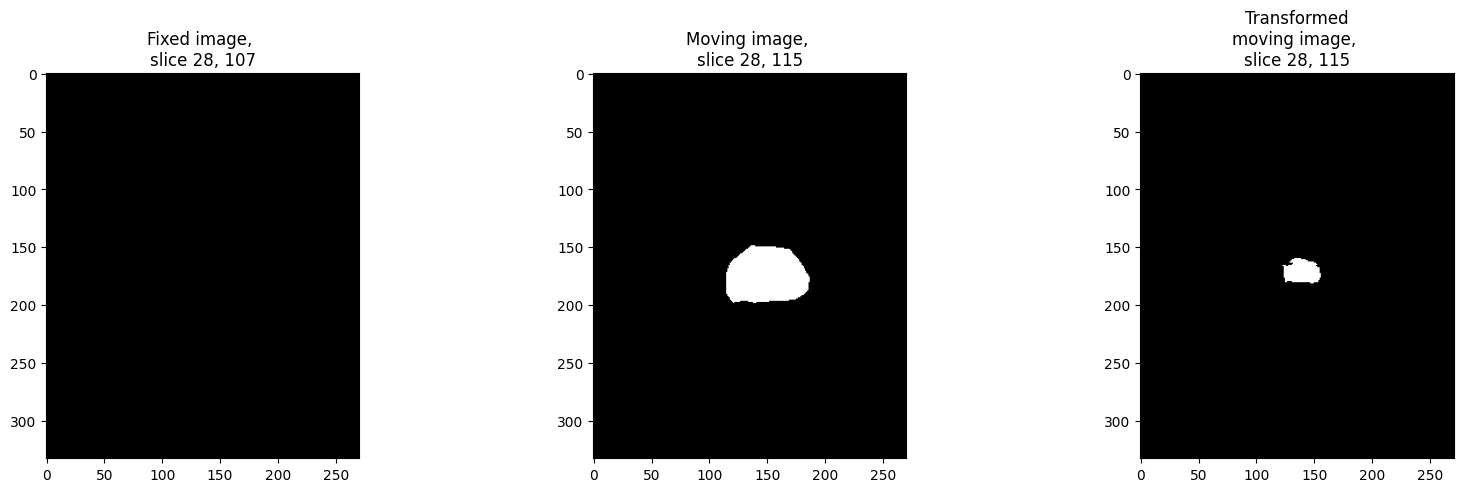

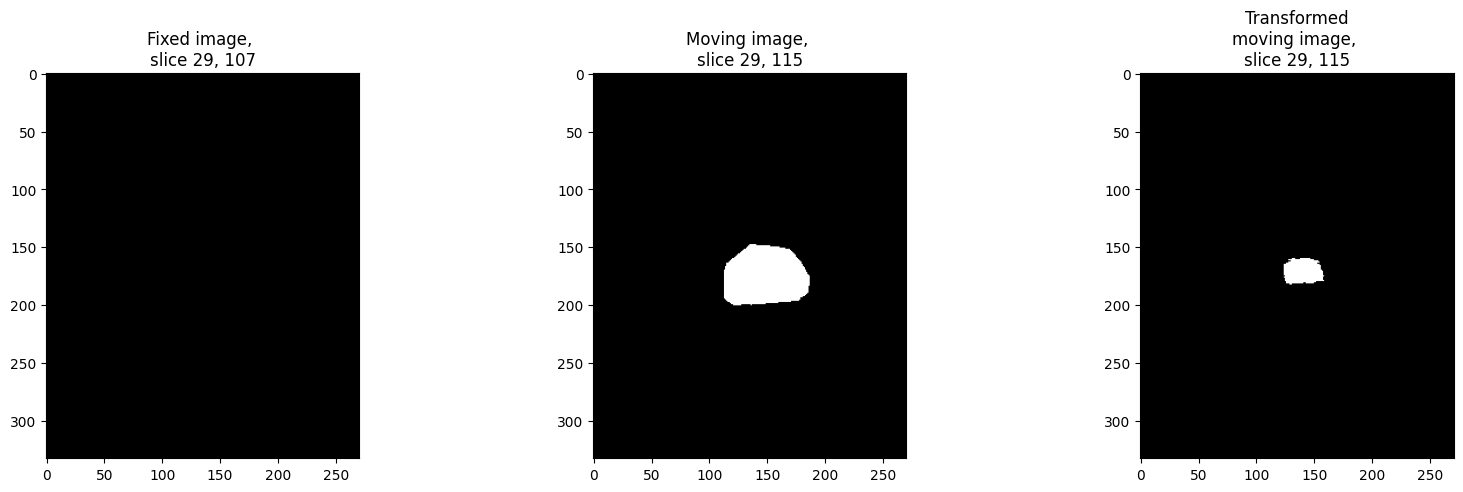

In [53]:
# path to the mask result from the affine transformation
result_path_experiment = os.path.join(output_file_path_experiment1, 'result.mhd')
transformed_moving_image = imageio.imread(result_path_experiment)

# path to fixed image mask
fixed_image_path_MASK =r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\prostaat.mhd'

readable_fixed_image_path_MASK = imageio.imread(fixed_image_path_MASK)
readable_moving_image_path_MASK = imageio.imread(moving_image_path)

for i in range(28,30):

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(readable_fixed_image_path_MASK[i,:,:], cmap='gray')
    ax[0].set_title('Fixed image, \nslice {}, {}'.format(i, patient_fixed))
    
    ax[1].imshow(readable_moving_image_path_MASK[i,:,:], cmap='gray')
    ax[1].set_title('Moving image, \nslice {}, {}'.format(i, patient_moving))
    
    ax[2].imshow(transformed_moving_image[i,:,:], cmap='gray')
    ax[2].set_title('Transformed\nmoving image, \nslice {}, {}'.format(i, patient_moving))
    
    plt.show()
    

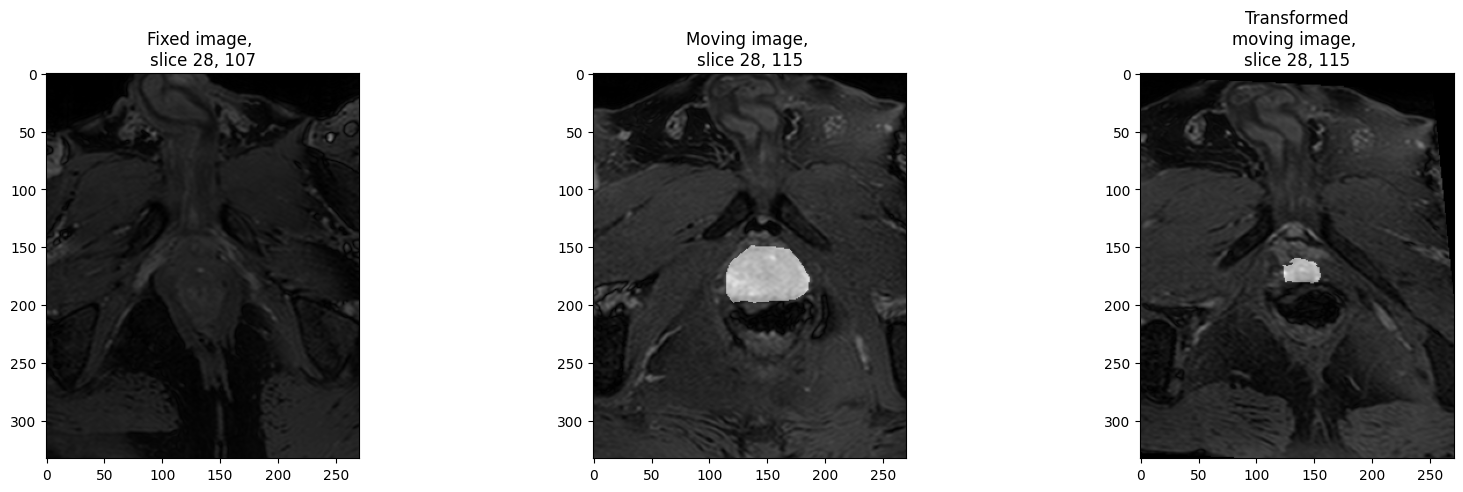

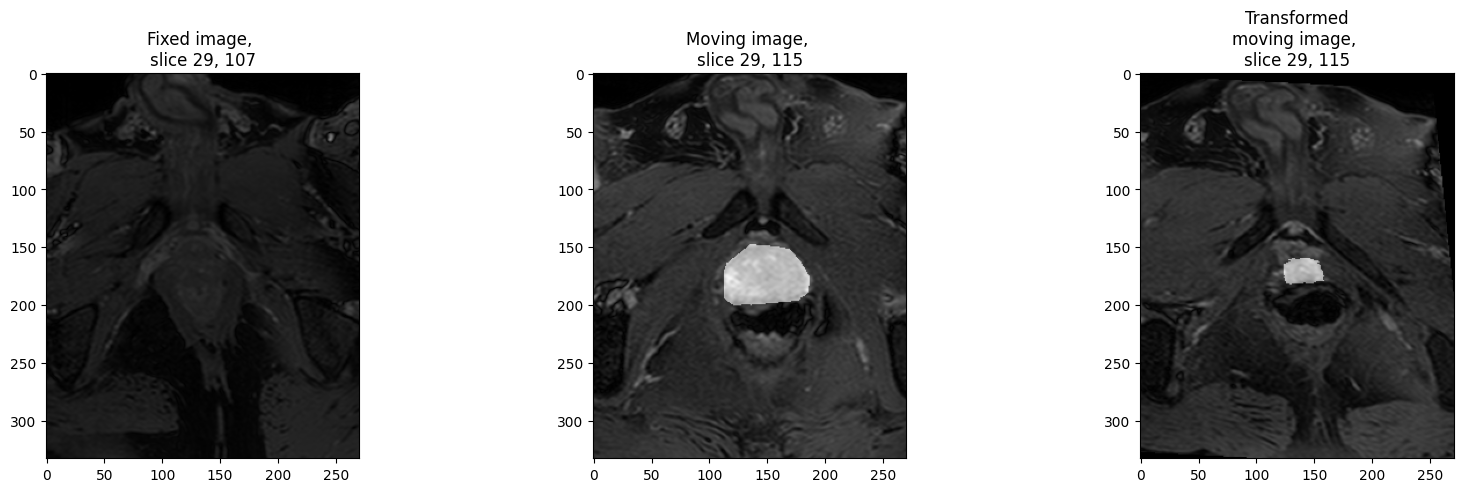

In [54]:

# to see masks and images overlayed

fixed_image_path_IM =r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\mr_bffe.mhd'
moving_image_path_IM = r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p115\mr_bffe.mhd'
result_path_experiment1 = os.path.join(output_file_path_experiment1, 'result.0.mhd')

readable_fixed_image_path_IM = imageio.imread(fixed_image_path_IM)
readable_moving_image_path_IM = imageio.imread(moving_image_path_IM)
transformed_moving_image_IM = imageio.imread(result_path_experiment1)


for i in range(28,30):

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    
    ax[0].imshow(readable_fixed_image_path_IM[i,:,:], cmap='gray')
    ax[0].imshow(readable_fixed_image_path_MASK[i,:,:], cmap='gray', alpha=0.5)
    ax[0].set_title('Fixed image, \nslice {}, {}'.format(i, patient_fixed))
    
    ax[1].imshow(readable_moving_image_path_IM[i,:,:], cmap='gray')
    ax[1].imshow(readable_moving_image_path_MASK[i,:,:], cmap='gray', alpha=0.5)
    ax[1].set_title('Moving image, \nslice {}, {}'.format(i, patient_moving))
    
    ax[2].imshow(transformed_moving_image_IM[i,:,:], cmap='gray')
    ax[2].imshow(transformed_moving_image[i,:,:], cmap='gray', alpha=0.5)
    ax[2].set_title('Transformed\nmoving image, \nslice {}, {}'.format(i, patient_moving))
    
    plt.show()
    

## 2. Apply b-spline transformation to the masks

In [55]:
# Make a new transformix object tr with the CORRECT PATH to transformix

# to Transformix.exe
TRANSFORMIX_PATH=r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\elastix_files\transformix.exe'
# again do the same with the transfomParameters file. Create a copy and put -->  (FinalBSplineInterpolationOrder 0)
transform_path = os.path.join(output_bfile_path_experiment,'TransformParameters.0b.txt')

print(transform_path)

tr = elastix.TransformixInterface(parameters=transform_path,
                                  transformix_path=TRANSFORMIX_PATH)

C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_bspline\TransformParameters.0b.txt


In [56]:
# path to moving image. now it is the mask result from the affine transformation
moving_image_path= r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\results_store\result.mhd'

# Transform a new image with the transformation parameters
tr.transform_image(moving_image_path, output_dir=output_bfile_path_experiment)

'C:\\Users\\pauli\\Desktop\\UNI\\UTRECHT\\3RD PERIOD COURSES\\CAPITA_SELECTA\\group project\\TrainingData\\TrainingData\\results_bspline\\result.mhd'

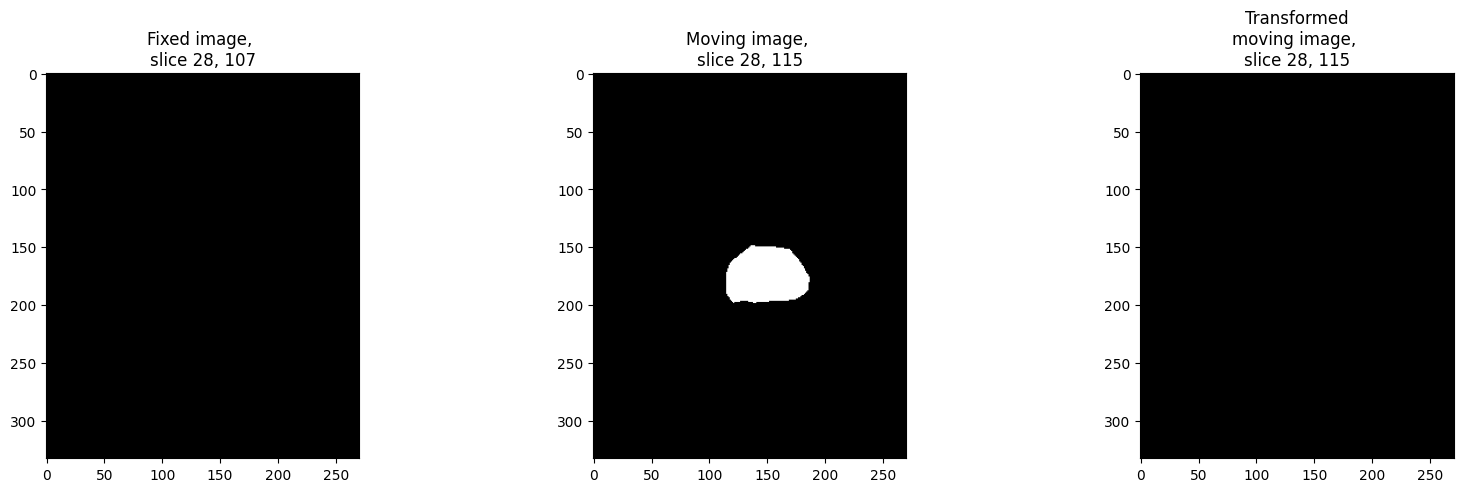

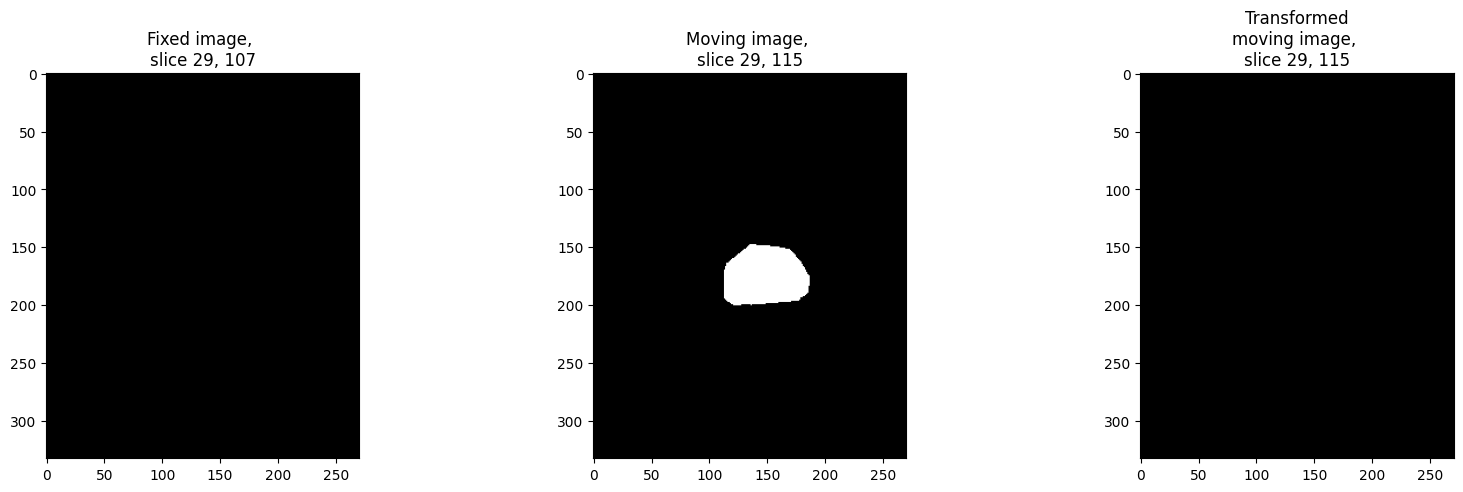

In [57]:
# path to mask result from b splines transformation
result_path_experiment = os.path.join(output_bfile_path_experiment, 'result.mhd')
transformed_moving_image = imageio.imread(result_path_experiment)

# path to original fixed and moving image masks
fixed_image_path_MASK =r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\prostaat.mhd'
moving_image_path_MASK =r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p115\prostaat.mhd'
readable_fixed_image_path_MASK = imageio.imread(fixed_image_path_MASK)
readable_moving_image_path_MASK = imageio.imread(moving_image_path_MASK)


for i in range(28,30):

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(readable_fixed_image_path_MASK[i,:,:], cmap='gray')
    ax[0].set_title('Fixed image, \nslice {}, {}'.format(i, patient_fixed))
    
    ax[1].imshow(readable_moving_image_path_MASK[i,:,:], cmap='gray')
    ax[1].set_title('Moving image, \nslice {}, {}'.format(i, patient_moving))
    
    ax[2].imshow(transformed_moving_image[i,:,:], cmap='gray')
    ax[2].set_title('Transformed\nmoving image, \nslice {}, {}'.format(i, patient_moving))
    
    plt.show()
    

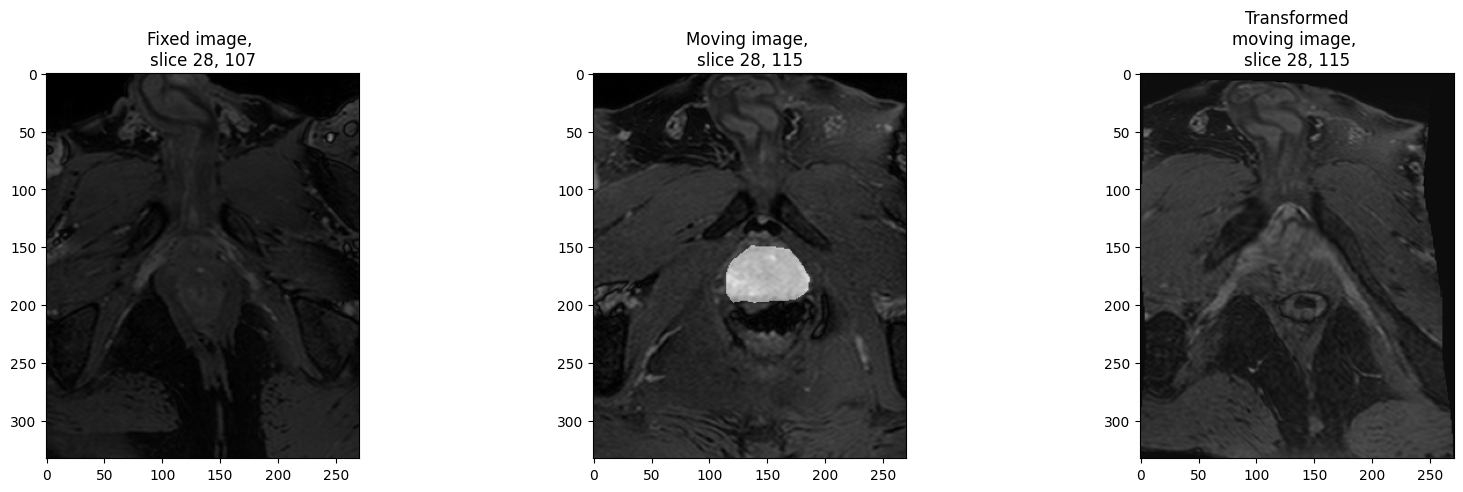

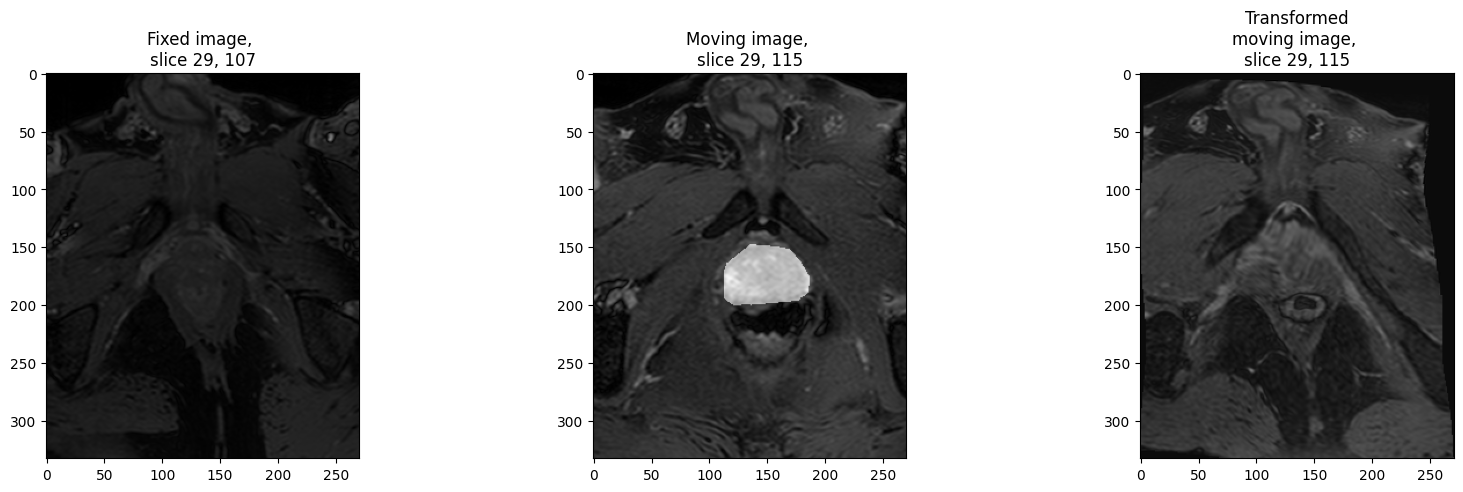

In [58]:

# to see masks and images overlayed

fixed_image_path_IM =r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p107\mr_bffe.mhd'
moving_image_path_IM = r'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p115\mr_bffe.mhd'
result_path_experiment1 = os.path.join(output_bfile_path_experiment, 'result.0.mhd')

readable_fixed_image_path_IM = imageio.imread(fixed_image_path_IM)
readable_moving_image_path_IM = imageio.imread(moving_image_path_IM)
transformed_moving_image_IM = imageio.imread(result_path_experiment1) 


for i in range(28,30):

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    
    ax[0].imshow(readable_fixed_image_path_IM[i,:,:], cmap='gray')
    ax[0].imshow(readable_fixed_image_path_MASK[i,:,:], cmap='gray', alpha=0.5)
    ax[0].set_title('Fixed image, \nslice {}, {}'.format(i, patient_fixed))
    
    ax[1].imshow(readable_moving_image_path_IM[i,:,:], cmap='gray')
    ax[1].imshow(readable_moving_image_path_MASK[i,:,:], cmap='gray', alpha=0.5)
    ax[1].set_title('Moving image, \nslice {}, {}'.format(i, patient_moving))
    
    ax[2].imshow(transformed_moving_image_IM[i,:,:], cmap='gray')
    ax[2].imshow(transformed_moving_image[i,:,:], cmap='gray', alpha=0.5)
    ax[2].set_title('Transformed\nmoving image, \nslice {}, {}'.format(i, patient_moving))
    
    plt.show()
    

### Random split between test and other data


In [84]:
import random

#Pick random samples to be test data

patient_nrs_list = ['p102','p107', 'p108', 'p109', 'p115', 'p116', 'p117', 
                    'p119', 'p120', 'p125', 'p127','p128', 'p129', 'p133', 'p135']
random.seed(103)
ran=random.sample(patient_nrs_list, 3)

print(ran)

['p128', 'p119', 'p135']


In [79]:
import shutil
#Move test data to other destination
for i in range(3):
    path_test=filepath_data+'\Test' 
    print(path_test)
    path_old=file_p_mr = filepath_data+ '\{}'.format(ran[i])
    print(path_old)
    shutil.move(file_p_mr, path_test)
    

C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\Test
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p129
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\Test
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p120
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\Test
C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p109


In [82]:
#remove test data from training patient list
print(patient_nrs_list)
patient_nrs_list

for j in range(len(patient_nrs_list)):
    if patient_nrs_list[j] in ran:
        patient_nrs_list.remove(patient_nrs_list[j])

print(patient_nrs_list)

['p102', 'p107', 'p108', 'p115', 'p116', 'p117', 'p125', 'p127', 'p128', 'p133']
['p102', 'p107', 'p108', 'p115', 'p116', 'p117', 'p125', 'p127', 'p128', 'p133']


In [83]:
import numpy as np


X_train=[] #dataset for cross validation
Y_train=[] #labels for cross validation
for k in range(len(patient_nrs_list)):
    file_p_mr = filepath_data+ '\{}\mr_bffe.mhd'.format(patient_nrs_list[k])
    file_p_mask = filepath_data+'\{}\prostaat.mhd'.format(patient_nrs_list[k]) 
    readable_mr = imageio.imread(file_p_mr)
    readable_mask=imageio.imread(file_p_mask)
    X_train.append(readable_mr)
    Y_train.append(readable_mask)


X_train=np.array(X_train)
Y_train=np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

FileNotFoundError: No such file: 'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p128\mr_bffe.mhd'

# **STAPLE**
Staple is a function which combines atlases. I was just curious to what it would do so just wrote some code to implement it. It is supposed to be a weighted voting algorithm but I am not exactly sure how it operates and if it works well. But maybe it could work after registering the atlases for each slice?


In [77]:
segs=['seg_0','seg_1','seg_2','seg_3','seg_4','seg_5','seg_6','seg_7','seg_8','seg_9','seg_10','seg_11']
seg_data=[]
for i in range(len(patient_nrs_list)):
    file_p_mask = filepath_data+'\{}\prostaat.mhd'.format(patient_nrs_list[i])
    readable_mask=imageio.imread(file_p_mask)
    segs[i]= readable_mask
    seg_data.append(segs[i])

FileNotFoundError: No such file: 'C:\Users\pauli\Desktop\UNI\UTRECHT\3RD PERIOD COURSES\CAPITA_SELECTA\group project\TrainingData\TrainingData\p119\prostaat.mhd'

In [ ]:
# STAPLE is availabe as a SITK package. To use, convert segmentations to SITK image objects
import numpy as np
segs=['seg_0','seg_1','seg_2','seg_3','seg_4','seg_5','seg_6','seg_7','seg_8','seg_9','seg_10','seg_11']
segs_itk=['seg0_itk','seg1_itk','seg2_itk','seg3_itk','seg4_itk','seg5_itk','seg6_itk','seg7_itk','seg8_itk','seg9_itk','seg10_itk','seg11_itk']

seg_stack=[]
for i in range(len(segs)):
    segs[i]=seg_data[i]
    segs_itk[i]= sitk.GetImageFromArray(seg_data[i].astype(np.int16))
    seg_stack.append(segs_itk[i])


# Run STAPLE algorithm
STAPLE_seg_sitk = sitk.STAPLE(seg_stack,1, 1.0)# 1.0 specifies the foreground value


# convert back to numpy array
STAPLE_seg = sitk.GetArrayFromImage(STAPLE_seg_sitk)
#STAPLE_seg =imageio.imread(STAPLE_seg_sitk)

In [ ]:
print(STAPLE_seg.shape[1])

for i in range(STAPLE_seg.shape[0]):
    for j in range(STAPLE_seg.shape[1]):
        for k in range(STAPLE_seg.shape[2]):
            if STAPLE_seg[i,j,k]<0.5:
                STAPLE_seg[i,j,k]=0
            else:
                STAPLE_seg[i,j,k]=1

In [ ]:
for i in range(STAPLE_seg.shape[0]):
    fig, ax= plt.subplots(1, 3, figsize=(15,3))
    ax[0].imshow(STAPLE_seg[i,:,:], cmap='gray')
    ax[1].imshow(seg_data[10][i,:,:], cmap='gray')
    ax[2].imshow(readable_mr[i,:,:],cmap='gray')
    ax[2].imshow(STAPLE_seg[i,:,:], cmap='gray',alpha=0.3)
    plt.show()